# BFGS and L-BFGS on Logistic Regression simple neural network

In [15]:
using NBInclude
@nbinclude("Iris_Binary.ipynb");
@nbinclude("Visualization.ipynb");
@nbinclude("LogRegNN.ipynb");
@nbinclude("BFGS_LBFGS.ipynb");

### Iris Binary Subset

In [16]:
X, Y = get_binary_iris();

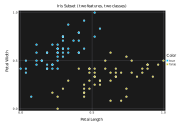

In [28]:
visualize_dataset( X[:, 1], X[:, 2], Y,
    "Iris Subset (two features, two classes)", "Petal Length", "Petal Width" )

### LogRegNN training using BFGS

In [18]:
""" Parameters """
ITERS = 5;
range = -0.01:0.001:0.01
HIDDEN_SIZE = 2
W1 = rand(range, 2, HIDDEN_SIZE )
# b1 = zeros((1, HIDDEN_SIZE))
b1 = [0.01 0.01]
W2 = rand(range, HIDDEN_SIZE, 1 )
b2 = 0.01;
weights = Dict("W1"=>[W1], "b1"=>[b1], "W2"=>[W2], "b2"=>[b2])

Dict{String,Array{T,1} where T} with 4 entries:
  "W2" => [[0.003; 0.005]]
  "W1" => [[0.008 0.001; -0.01 0.006]]
  "b2" => [0.01]
  "b1" => [[0.01 0.01]]

In [19]:
losses = train_LogRegNN_BFGS( weights, ITERS )


==== Iteration 1 ====
Iteration 1 finished. Weights:
W2 [-0.0027661; 0.00196618]
W1 [0.00222407 -0.00849802; -0.01305831 -0.00353238]
b2 0.00046773
b1 [0.0004676 0.00046755]

==== Iteration 2 ====
Iteration 2 finished. Weights:
W2 [-0.00281305; 0.00208291]
W1 [0.00219906 -0.00841161; -0.0129403 -0.0034173]
b2 0.00028589
b1 [0.0003057 0.0002564]

==== Iteration 3 ====
Iteration 3 finished. Weights:
W2 [-0.00281246; 0.00208169]
W1 [0.00219964 -0.00841251; -0.01294152 -0.00341828]
b2 0.00028813
b1 [0.00030802 0.0002564]

==== Iteration 4 ====
Iteration 4 finished. Weights:
W2 [-0.00280811; 0.00206279]
W1 [0.00220865 -0.00843235; -0.01295486 -0.00342224]
b2 0.00031729
b1 [0.00033721 0.00025684]

==== Iteration 5 ====
Iteration 5 finished. Weights:
W2 [-0.00282233; 0.00210244]
W1 [0.00219314 -0.00839655; -0.01292822 -0.00341397]
b2 0.00025758
b1 [0.0002861 0.00025686]


1×5 Array{Float64,2}:
 8.99996  0.608904  0.605512  0.605512  0.605445

In [26]:
for (k,v) in weights println(k,"\t", v[end]) end

W2	[-0.00282233; 0.00210244]
W1	[0.00219314 -0.00839655; -0.01292822 -0.00341397]
b2	0.00025758
b1	[0.0002861 0.00025686]


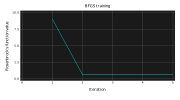

In [27]:
# y = [round(v, digits=8) for v in values]
visualize_training_process( length(losses), losses,
    "BFGS training", "Iteration", "Rosenbrock's function value" )

In [75]:
SPAN = 500; LEFT = -0.005; RIGHT = 0.01
W2_ax = LinRange( LEFT, RIGHT, SPAN );

levels = [LinRange(0, 10, 50)...];

In [76]:
W2_history = zeros(2, ITERS)
for i in 1:ITERS
    W2_history[1,i] = weights["W2"][i][1]
    W2_history[2,i] = weights["W2"][i][2]
end
W2_history

2×5 Array{Float64,2}:
 0.003  -0.0027661   -0.00281305  -0.00281246  -0.00280811
 0.005   0.00196618   0.00208291   0.00208169   0.00206279

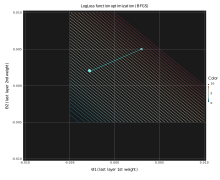

In [77]:
contour_cost(
    W2_ax, W2_ax,
    (x, y) -> cost_for_W2(x, y, Y), levels,
    W2_history, 1,
    "LogLoss function optimization (BFGS)",
    "Θ1 (last layer 1st weight)",
    "Θ2 (last layer 2nd weight)",
)